In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

#data_link = https://open.toronto.ca/dataset/toronto-beaches-water-quality/

df = pd.read_csv('toronto_beaches_water_quality.csv')
df = df.dropna(subset=['eColi'])

# Clean data
df['Collection Date'] = pd.to_datetime(df['collectionDate'])

df['Status'] = df['eColi'].apply(lambda x: 'Fail' if x > 100 else 'Pass')

df['Month'] = df['Collection Date'].dt.month_name()  # Create month column

# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Visualization with ordered months
fig = px.histogram(
    df, 
    x='Month',
    color='Status',
    color_discrete_map={'Pass':'green', 'Fail':'red'},
    title="Toronto Beaches Water Quality (till 2024)",
    labels={'x': 'Month', 'color': 'Safety Status'},
    category_orders={"Month": month_order}  # This enforces the order
)
fig.update_layout(
    bargap=0.2,
    xaxis={'categoryorder': 'array', 'categoryarray': month_order}  # Double enforcement
)
fig.show()

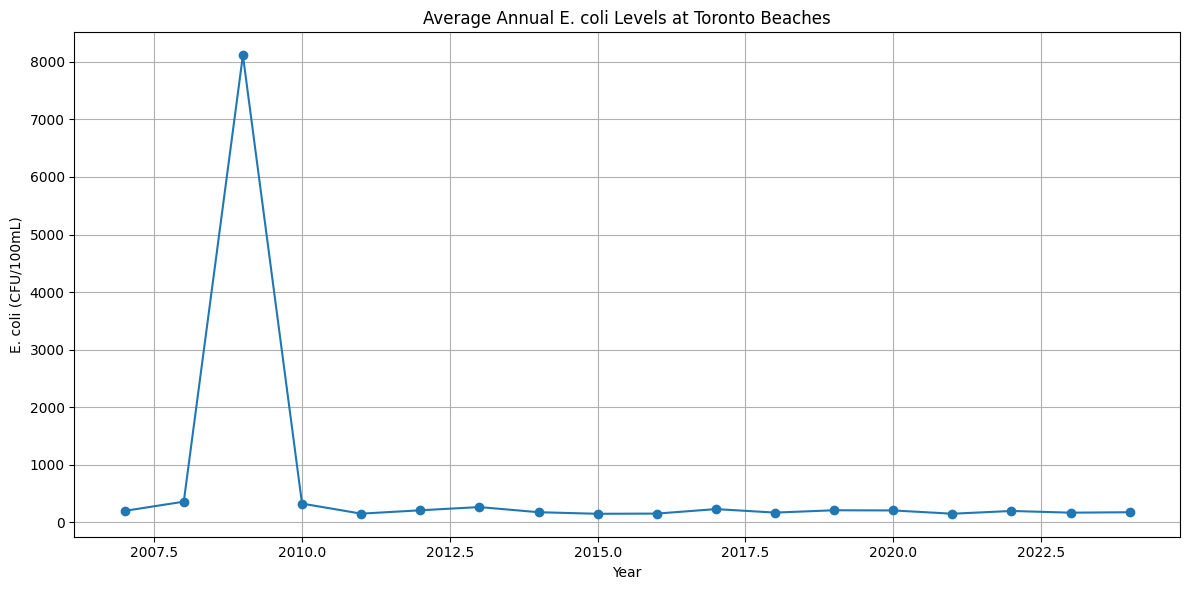

In [5]:

# Extract the year from the 'Date' column
df['Year'] = df['Collection Date'].dt.year

# Calculate the average E. coli level per year
annual_avg_ecoli = df.groupby('Year')['eColi'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_ecoli['Year'], annual_avg_ecoli['eColi'], marker='o', linestyle='-')
plt.title('Average Annual E. coli Levels at Toronto Beaches')
plt.xlabel('Year')
plt.ylabel('E. coli (CFU/100mL)')
plt.grid(True)
plt.tight_layout()
plt.show()